In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")


In [2]:
customer_df = pd.read_csv('../data/processed/customer_features.csv')

print(f"Total customers: {len(customer_df)}")
print(f"Churn rate: {customer_df['Churn'].mean()*100:.2f}%")

customer_df.head()


Total customers: 3242
Churn rate: 42.84%


,CustomerID,Churn,Recency,Frequency,TotalSpent,AvgOrderValue,UniqueProducts,TotalItems,CustomerLifetimeDays
0,16384,0,173,1,392.10,17.047826,23,198,0
1,16385,0,67,2,239.47,7.043235,33,148,208
2,16386,0,163,1,61.10,15.275000,4,26,0
3,16387,1,232,1,94.36,23.590000,4,44,0
4,16389,0,114,2,496.05,35.432143,14,223,77


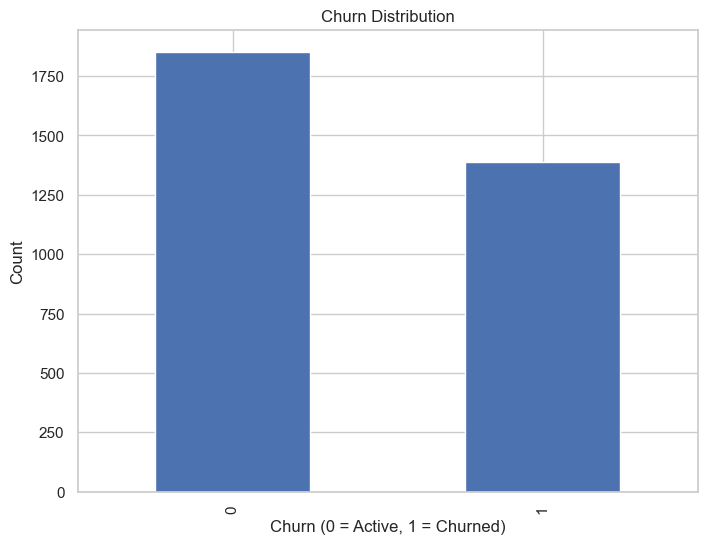

In [3]:
plt.figure(figsize=(8,6))
customer_df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = Active, 1 = Churned)')
plt.ylabel('Count')
plt.savefig('../visualizations/01_churn_distribution.png')
plt.show()


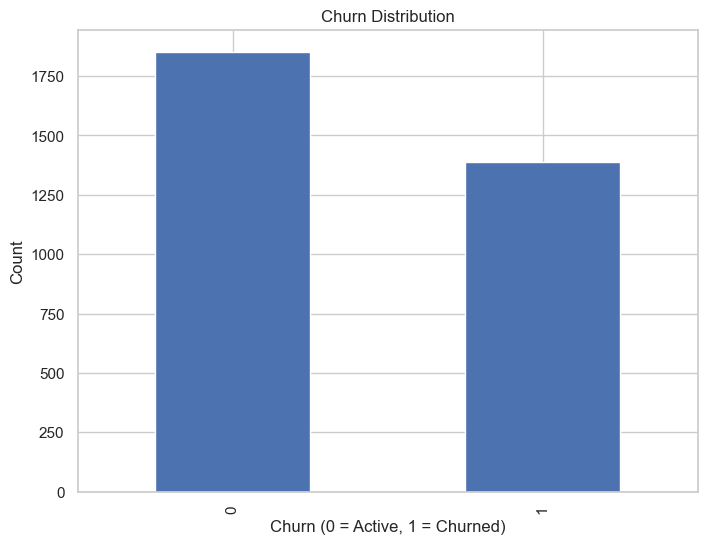

In [4]:
plt.figure(figsize=(8,6))
customer_df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = Active, 1 = Churned)')
plt.ylabel('Count')
plt.savefig('../visualizations/01_churn_distribution.png')
plt.show()


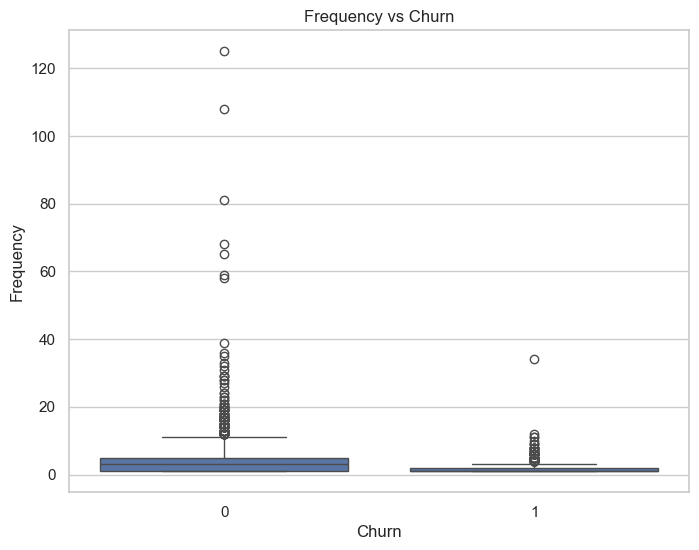

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Frequency', data=customer_df)
plt.title('Frequency vs Churn')
plt.savefig('../visualizations/03_frequency_vs_churn.png')
plt.show()


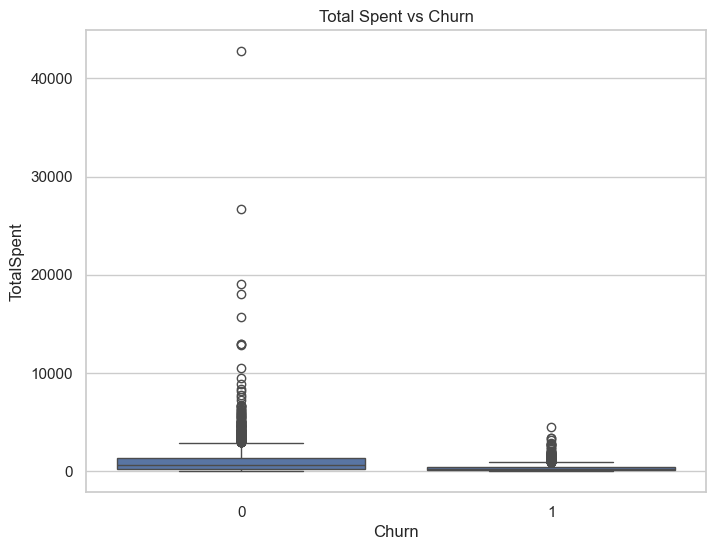

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='TotalSpent', data=customer_df)
plt.title('Total Spent vs Churn')
plt.savefig('../visualizations/04_totalspent_vs_churn.png')
plt.show()


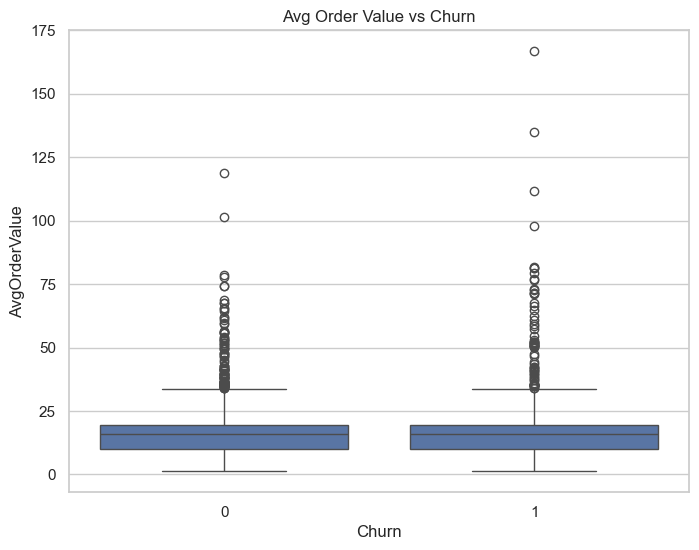

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='AvgOrderValue', data=customer_df)
plt.title('Avg Order Value vs Churn')
plt.savefig('../visualizations/05_aov_vs_churn.png')
plt.show()


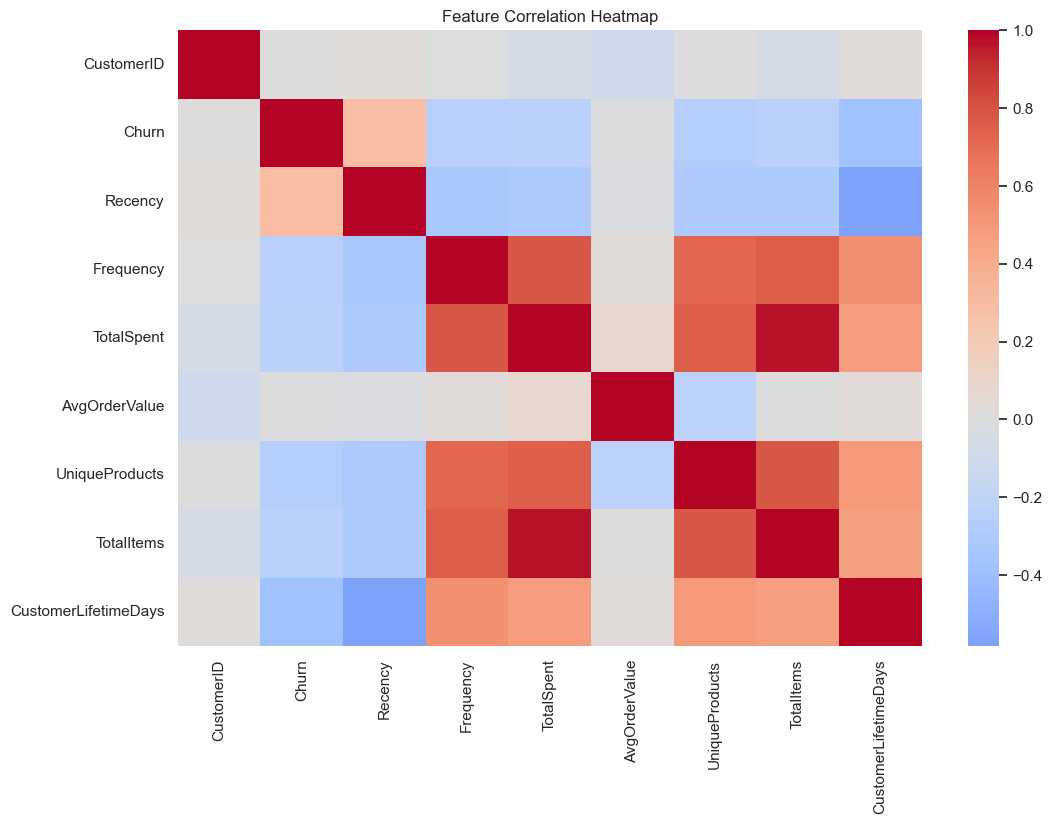

In [8]:
plt.figure(figsize=(12,8))
corr = customer_df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.savefig('../visualizations/06_correlation_heatmap.png')
plt.show()


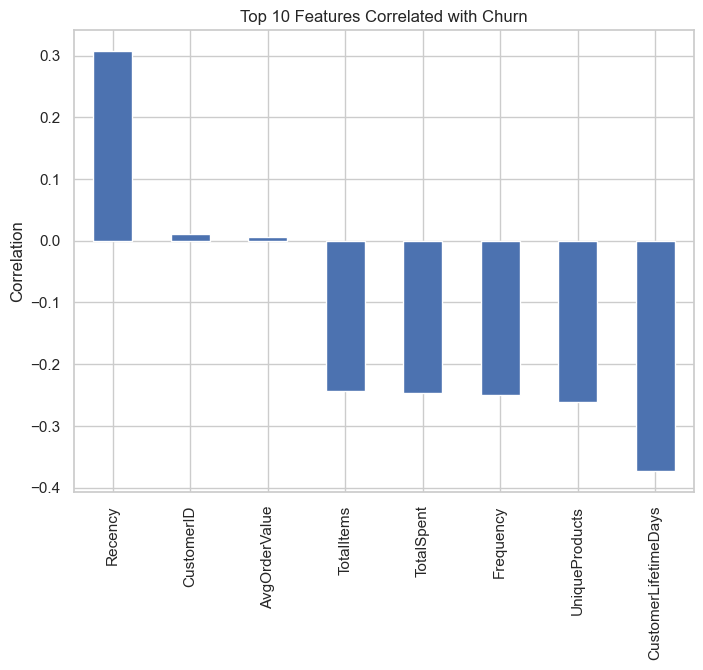

In [20]:
churn_corr = corr['Churn'].sort_values(ascending=False)

churn_corr[1:11].plot(kind='bar', figsize=(8,6))
plt.title('Top 10 Features Correlated with Churn')
plt.ylabel('Correlation')
plt.savefig('../visualizations/07_top_churn_correlations.png')
plt.show()


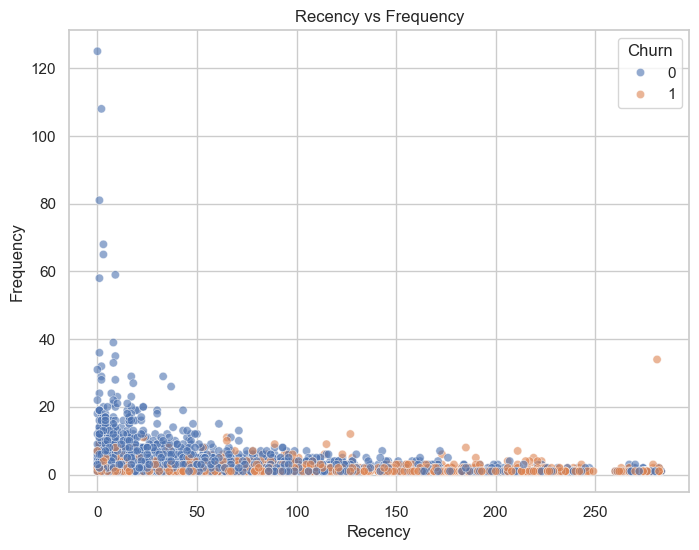

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Recency', 
    y='Frequency', 
    hue='Churn', 
    data=customer_df,
    alpha=0.6
)
plt.title('Recency vs Frequency')
plt.savefig('../visualizations/08_recency_frequency.png')
plt.show()


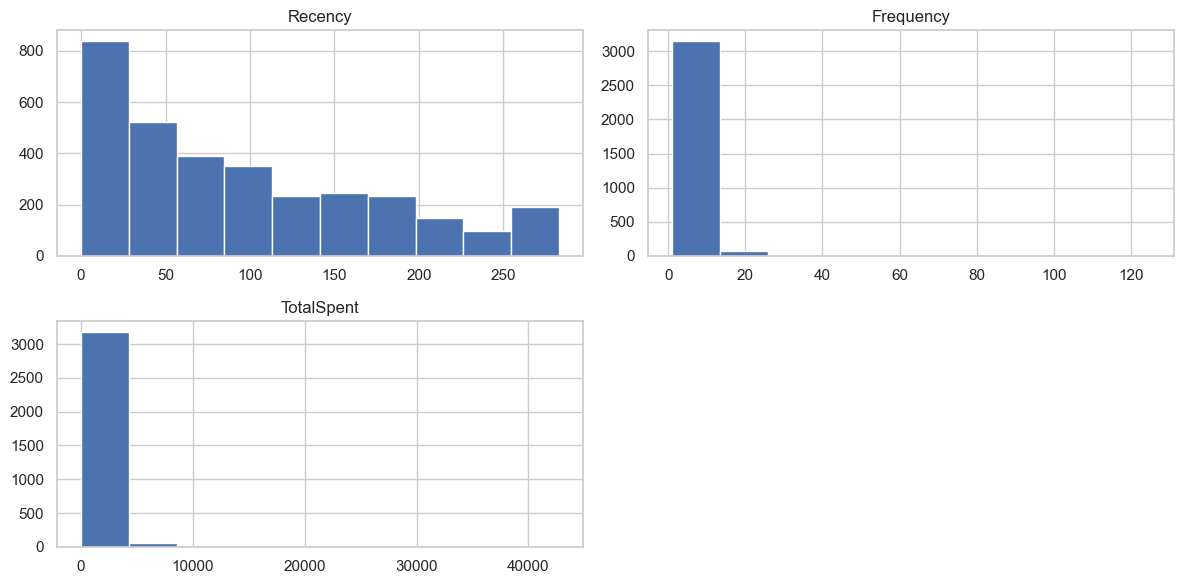

In [11]:
customer_df[['Recency','Frequency','TotalSpent']].hist(figsize=(12,6))
plt.tight_layout()
plt.savefig('../visualizations/09_feature_distributions.png')
plt.show()


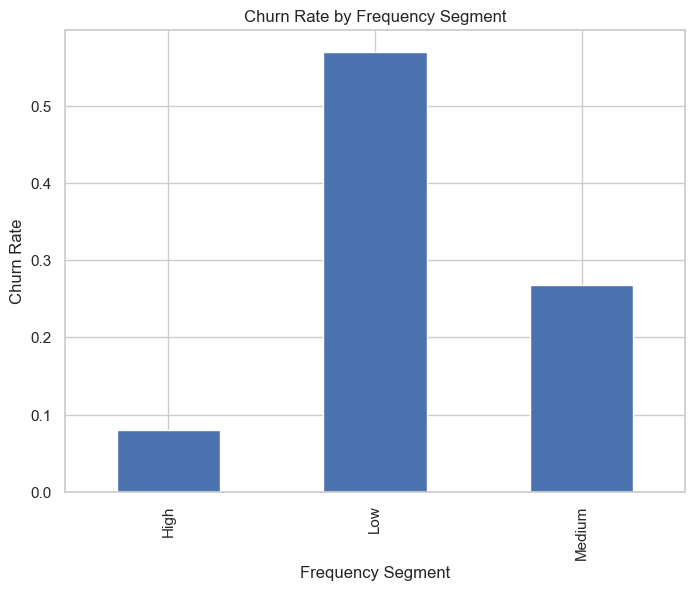

In [15]:
# SAFE FREQUENCY SEGMENTATION (NO qcut, NO ERRORS)

def freq_segment(freq):
    if freq <= 2:
        return 'Low'
    elif freq <= 5:
        return 'Medium'
    else:
        return 'High'

customer_df['FreqSegment'] = customer_df['Frequency'].apply(freq_segment)

segment_churn = customer_df.groupby('FreqSegment')['Churn'].mean()

segment_churn.plot(kind='bar', figsize=(8,6))
plt.title('Churn Rate by Frequency Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Frequency Segment')
plt.savefig('../visualizations/10_segment_churn.png')
plt.show()


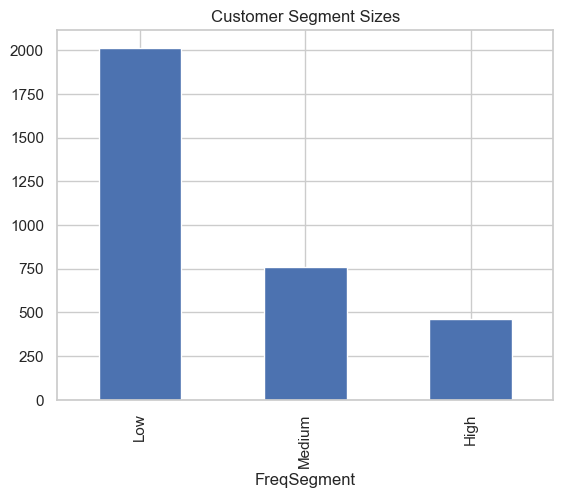

In [16]:
customer_df['FreqSegment'].value_counts().plot(kind='bar')
plt.title('Customer Segment Sizes')
plt.savefig('../visualizations/11_segment_sizes.png')
plt.show()


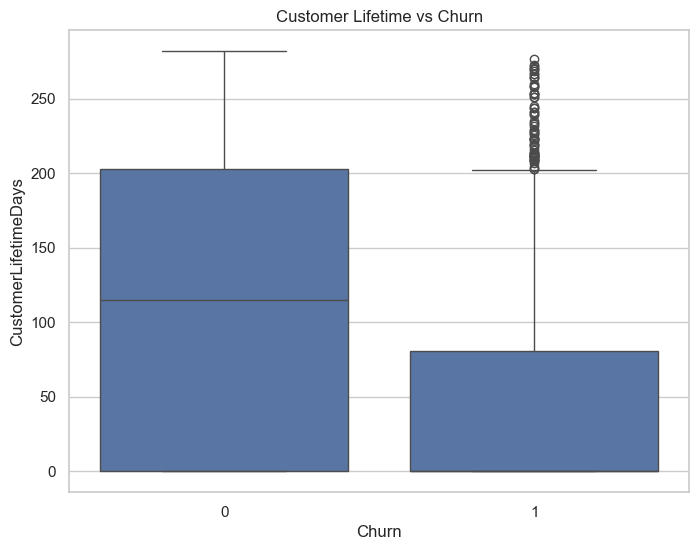

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='CustomerLifetimeDays', data=customer_df)
plt.title('Customer Lifetime vs Churn')
plt.savefig('../visualizations/12_lifetime_vs_churn.png')
plt.show()


In [18]:
features = ['Recency','Frequency','TotalSpent','AvgOrderValue','CustomerLifetimeDays']

for col in features:
    churned = customer_df[customer_df['Churn']==1][col]
    active = customer_df[customer_df['Churn']==0][col]
    
    t,p = stats.ttest_ind(churned, active, equal_var=False)
    print(f"{col}: p-value = {p:.5f}")


Recency: p-value = 0.00000
Frequency: p-value = 0.00000
TotalSpent: p-value = 0.00000
AvgOrderValue: p-value = 0.70556
CustomerLifetimeDays: p-value = 0.00000


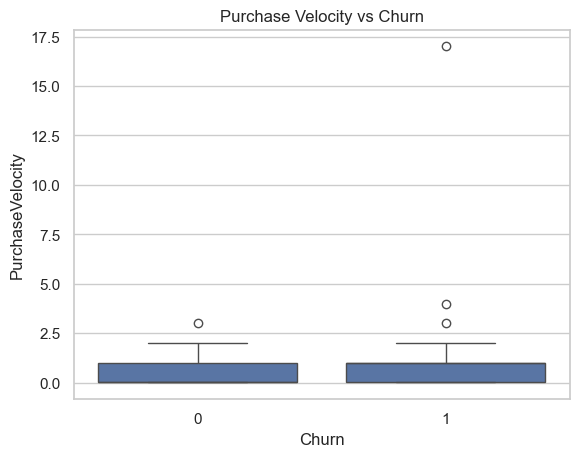

In [19]:
customer_df['PurchaseVelocity'] = customer_df['Frequency'] / (customer_df['CustomerLifetimeDays'] + 1)

sns.boxplot(x='Churn', y='PurchaseVelocity', data=customer_df)
plt.title('Purchase Velocity vs Churn')
plt.savefig('../visualizations/13_velocity_vs_churn.png')
plt.show()
